In [4]:
import matplotlib
print(matplotlib.__version__)

3.3.4


# SUGAR  CANE YIELD IN hg/ha FOR AFRICA

In [11]:
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np
sns.set(color_codes=True)
sugar = pd.read_csv('CEN414DATA.csv')
sugar.info()
sugar
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  410 non-null    object 
 1   Code                    357 non-null    object 
 2   Year                    410 non-null    int64  
 3   Sugar cane-Yield-hg/ha  410 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


,Entity,Code,Year,Sugar cane-Yield-hg/ha
0,Africa,NaN,2009,64.6924
1,Africa,NaN,2010,63.8202
2,Africa,NaN,2011,64.2525
3,Africa,NaN,2012,63.8544
4,Africa,NaN,2013,65.1940
...,...,...,...,...
405,Zimbabwe,ZWE,2014,89.4228
406,Zimbabwe,ZWE,2015,77.6906
407,Zimbabwe,ZWE,2016,80.0690
408,Zimbabwe,ZWE,2017,80.0368


#In the following cells, we examine the Sugar cane Yields(hg/ha) in African Countries for some years. As the given dataset gotten from http://ourworldindata.com has values from only the years 2009-2018, we shall examine the relationships and trends within this period.    


#BAR GRAPH OF AFRICAN COUNTRIES FROM 2009-2018

No handles with labels found to put in legend.
C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

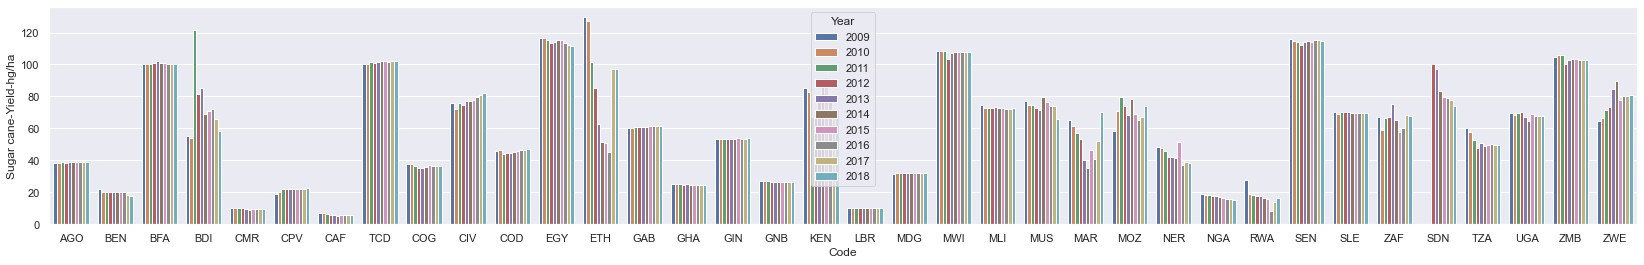

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sugar = pd.read_csv('CEN414DATA.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


 
    

plt.legend(loc='upper right')
sns.barplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year'])


#BOX PLOT GRAPH OF AFRICAN COUNTRIES FROM 2009-2018

C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


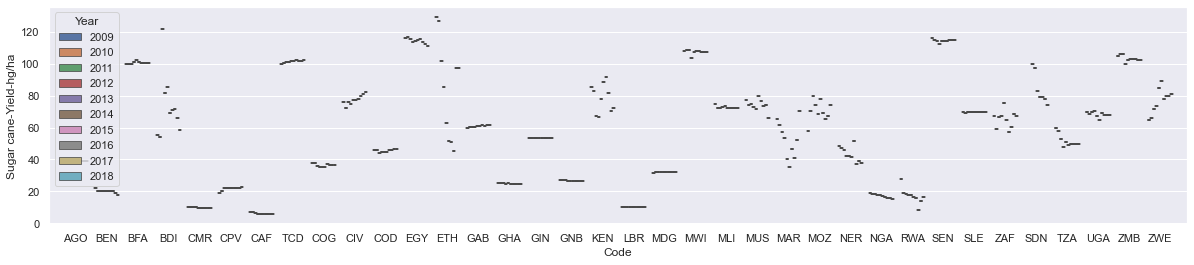

In [4]:
sns.boxplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year'])
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()


#POINT GRAPH OF AFRICAN COUNTRIES FROM 2009-2018

C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

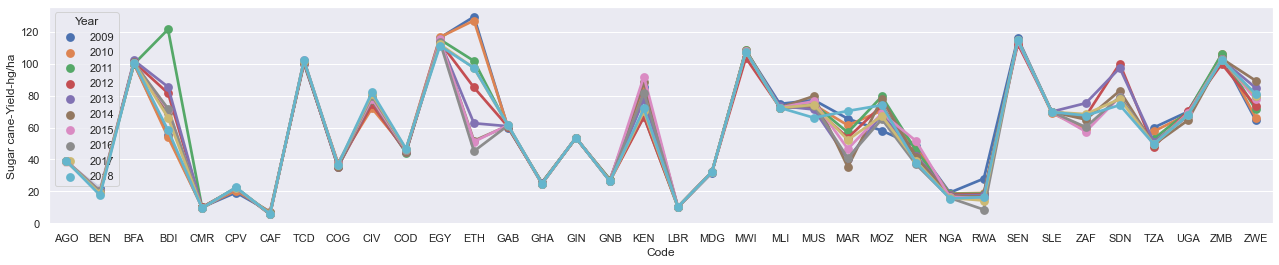

In [5]:
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
sns.pointplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year']) 
 


#STRIP PLOT GRAPH OF AFRICAN COUNTRIES FROM 2009-2018

C:\Users\danzy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Code', ylabel='Sugar cane-Yield-hg/ha'>

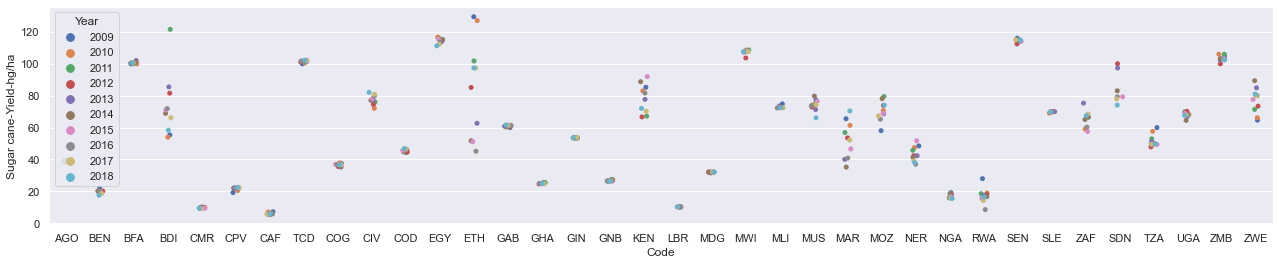

In [6]:
 plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*46+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
sns.stripplot(sugar['Code'],sugar['Sugar cane-Yield-hg/ha'],  sugar['Year']) 

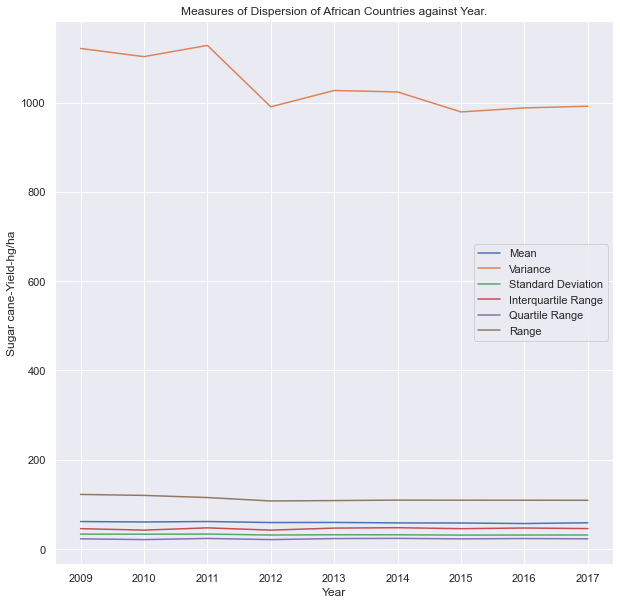

In [12]:
 plt.figure(figsize=(10,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2009,2018):
            ls.append(fn(sugar[sugar['Year'] == year]['Sugar cane-Yield-hg/ha']))
              
    plt.plot(range(2009,2018), ls, label=label)
    plt.title('Measures of Dispersion of African Countries against Year.')
    plt.ylabel('Sugar cane-Yield-hg/ha')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')